In [5]:
import numpy as np
import pandas as pd
import requests

# 1. Data Preparation

In [13]:
df = pd.read_csv('data.csv')

In [15]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [19]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [20]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [21]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [23]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [25]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [26]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [27]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# 2. Exploratory Data Analysis

In [30]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

### Distribution of Price

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

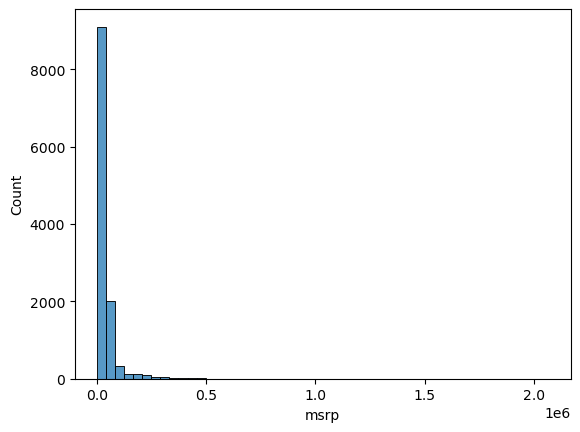

In [38]:
sns.histplot(df.msrp, bins = 50)

- The above distribution is called long tail distribution
- Long-tail distributions usually confuse the ML models, so the recommendation is to transform the target variable distribution to a normal one whenever possible.

<Axes: xlabel='msrp', ylabel='Count'>

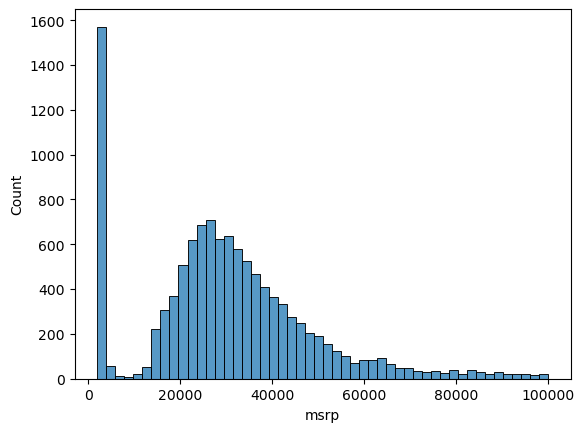

In [40]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)

### Logarithmic Distribution

In [44]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [45]:
np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [46]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

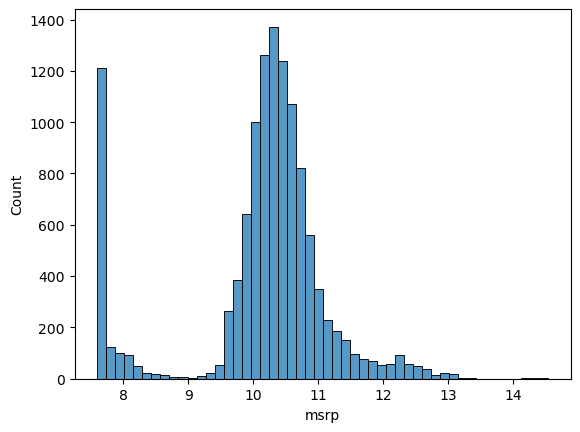

In [47]:
sns.histplot(price_logs, bins = 50)

- The above graph states a normal distribution with bell shaped curve

### Missing Values

In [48]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 3. Setting up the validation framework

In [55]:
n = len(df)
n_val = int(len(df)*0.2)  #20% of df
n_test = int(len(df)*0.2)  #20% of df
n_train = n - n_val - n_test  #60% of df

In [56]:
n, n_val ,n_test ,n_train

(11914, 2382, 2382, 7150)

### Creating new dataframes

In [79]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_val + n_train:]

In [80]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


### Shuffling the data

In [81]:
idx = np.arange(n)
np.random.seed(6)
np.random.shuffle(idx)

In [82]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_val + n_train:]]

In [86]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [87]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,mercedes-benz,e-class,2016,premium_unleaded_(required),302.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,29,20,617,53100
1,buick,verano,2015,regular_unleaded,180.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,32,21,155,21065
2,ford,expedition,2016,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,NaN,large,4dr_suv,20,15,5657,48360
3,suzuki,esteem,2001,regular_unleaded,122.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,30,23,481,15199
4,chevrolet,malibu_classic,2008,regular_unleaded,145.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,30,22,1385,17935


In [88]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [92]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [93]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [96]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,mercedes-benz,e-class,2016,premium_unleaded_(required),302.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,29,20,617
1,buick,verano,2015,regular_unleaded,180.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,32,21,155
2,ford,expedition,2016,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,NaN,large,4dr_suv,20,15,5657
3,suzuki,esteem,2001,regular_unleaded,122.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,30,23,481
4,chevrolet,malibu_classic,2008,regular_unleaded,145.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,30,22,1385


In [97]:
y_train

array([10.87995104,  9.95541565, 10.78644898, ..., 12.99453228,
       10.16087793, 10.16838706])

# 5. Linear Regression

In [98]:
##Eg train data
df_train.iloc[10]

make                            mazda
model                            cx-3
year                             2016
engine_fuel_type     regular_unleaded
engine_hp                       146.0
engine_cylinders                  4.0
transmission_type           automatic
driven_wheels         all_wheel_drive
number_of_doors                   4.0
market_category             crossover
vehicle_size                  compact
vehicle_style                 4dr_suv
highway_mpg                        32
city_mpg                           27
popularity                        586
Name: 10, dtype: object

In [111]:
def linear_reg(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j]*xi[j]
    return pred

We take as an example the characteristic enging_hp, city_mpg, and popularity.

In [112]:
xi = [138, 24, 1385]
w0 = 0
w = [1, 1, 1]
 
linear_reg(xi)

1547

In [113]:
xi = [138, 24, 1385]
w0 = 7.17
w = [0.01, 0.04, 0.002]
linear_reg(xi)

12.280000000000001

In [114]:
np.expm1(12.280000000000001)  #as we did log1p to df

215344.7166272456

In [115]:
np.log1p(215344.7166272456)  #check

12.280000000000001

# 6. Linear regression vector form

In [122]:
def dot(xi, w):
    n = len(xi)
     
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
         
    return res

In [123]:
def lin_regression(xi):
    return w0 + dot(xi, w) 

In [125]:
xi = [138, 24, 1385]
w0 = 7.17
w = [0.01, 0.04, 0.002]
 
# adding w0 to the vector w
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [126]:
def lin_reg(xi):
    xi = [1] + xi
    return dot(xi, w_new)
 
lin_reg(xi)

12.280000000000001

In [116]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [117]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]
 
# X becomes a list of lists
X = [x1, x2, x10]
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

In [118]:
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [119]:
y = X.dot(w_new)

In [127]:
y

array([12.38 , 13.552, 12.312])

In [120]:
np.expm1(y)

array([237992.82334859, 768348.51018973, 222347.22211011])

In [121]:
def linear_regression(X):
    return X.dot(w_new)
 
y = linear_regression(X)
np.expm1(y)

array([237992.82334859, 768348.51018973, 222347.22211011])

# 7. Training a Linear Regression Model

In [129]:
# example train values
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
 
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   83],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [131]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [133]:
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 1.000e+00, 4.130e+02, 1.100e+01, 8.300e+01],
       [1.000e+00, 1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [135]:
# sample y values
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [137]:
#GRAM MATRIX
XTX = X.T.dot(X)

In [138]:
#inverse GRAM MATRIX
XTX_inv = np.linalg.inv(XTX)

In [139]:
w_full = XTX_inv.dot(X.T).dot(y)

In [141]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(1.1803887523479435e+21,
 array([-1.18038875e+21,  2.65523467e+01,  2.45817993e-12, -6.94661137e+01]))

In [128]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [142]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
 
X = np.array(X)
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]
 
train_linear_regression(X, y)

(30009.2529227667, array([ -22.78396914, -257.69087426,   -2.30322797]))

# 8. Car price baseline model

In [144]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [145]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [146]:
base = ['engine_hp','engine_cylinders',
        'highway_mpg', 'city_mpg', 'popularity']

In [147]:
X_train = df_train[base].values

In [148]:
y_train

array([10.87995104,  9.95541565, 10.78644898, ..., 12.99453228,
       10.16087793, 10.16838706])

In [149]:
df_train[base].isnull().sum()

engine_hp           32
engine_cylinders    18
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [151]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [152]:
X_train = df_train[base].fillna(0).values

In [154]:
w0 , w = train_linear_regression(X_train, y_train)

In [156]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

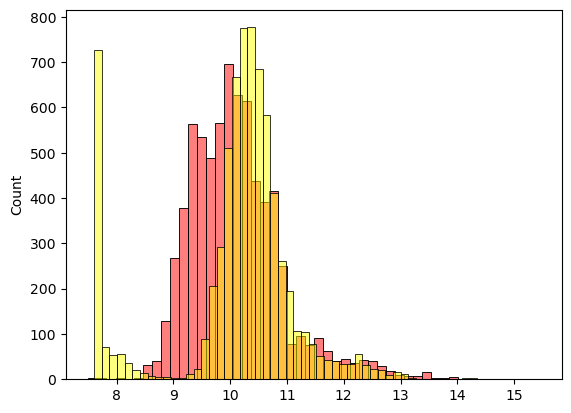

In [160]:
sns.histplot(y_pred, color = 'red',alpha = 0.5, bins=50)
sns.histplot(y_train, color = 'yellow',alpha = 0.5, bins = 50)

# 9. RMSE

In [161]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [162]:
rmse(y_train, y_pred)

0.7489950550951462

# 10. Validating the model

In [166]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
 
X_train = df_train[base].fillna(0).values
 
w0, w = train_linear_regression(X_train, y_train)
 
y_pred = w0 + X_train.dot(w)

In [167]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [168]:
# Training part:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
# Validation part:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
# Evaluation part:
rmse(y_val, y_pred)

0.748260144569483

# 11. Simple Feature Engineering

In [169]:
df_train.year.max()

2017

In [170]:
2017 - df_train.year

0        1
1        2
2        1
3       16
4        9
        ..
7145    26
7146     0
7147    12
7148     8
7149     1
Name: year, Length: 7150, dtype: int64

In [179]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [182]:
# Training part:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
# Validation part:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
# Evaluation part:
rmse(y_val, y_pred)

0.512622123513688

<Axes: ylabel='Count'>

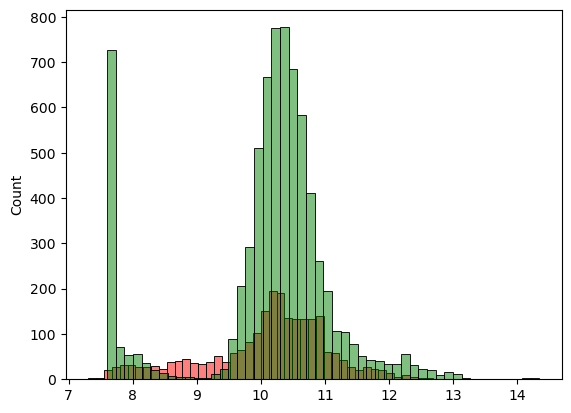

In [185]:
sns.histplot(y_pred, color = 'red',alpha = 0.5, bins=50)
sns.histplot(y_train, color = 'green',alpha = 0.5, bins = 50)

# 12. Categorical Variables

In [191]:
for v in [2,3,4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

In [192]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,mercedes-benz,e-class,2016,premium_unleaded_(required),302.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,29,20,617,0,0,1
1,buick,verano,2015,regular_unleaded,180.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,32,21,155,0,0,1
2,ford,expedition,2016,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,NaN,large,4dr_suv,20,15,5657,0,0,1
3,suzuki,esteem,2001,regular_unleaded,122.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,30,23,481,0,0,1
4,chevrolet,malibu_classic,2008,regular_unleaded,145.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,30,22,1385,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,volkswagen,cabriolet,1991,regular_unleaded,94.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,convertible,29,22,873,1,0,0
7146,chevrolet,corvette,2017,premium_unleaded_(required),650.0,8.0,manual,rear_wheel_drive,2.0,"factory_tuner,high-performance",compact,coupe,22,15,1385,1,0,0
7147,porsche,carrera_gt,2005,premium_unleaded_(required),605.0,10.0,manual,rear_wheel_drive,2.0,"exotic,luxury,high-performance",compact,convertible,15,9,1715,1,0,0
7148,volkswagen,gli,2009,premium_unleaded_(recommended),200.0,4.0,automated_manual,front_wheel_drive,4.0,performance,compact,sedan,29,22,873,0,0,1


In [193]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [195]:
prepare_X(df_train)

array([[302.,   6.,  29., ...,   0.,   0.,   1.],
       [180.,   4.,  32., ...,   0.,   0.,   1.],
       [365.,   6.,  20., ...,   0.,   0.,   1.],
       ...,
       [605.,  10.,  15., ...,   1.,   0.,   0.],
       [200.,   4.,  29., ...,   0.,   0.,   1.],
       [189.,   4.,  35., ...,   0.,   0.,   1.]])

In [196]:
# Training part:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
# Validation part:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
# Evaluation part:
rmse(y_val, y_pred)

0.5086655426340567

In [199]:
df.make.value_counts()

make
chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyke

In [211]:
makes = list(df.make.value_counts().head(10).index)
makes

['chevrolet',
 'ford',
 'volkswagen',
 'toyota',
 'dodge',
 'nissan',
 'gmc',
 'honda',
 'mazda',
 'cadillac']

In [212]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [213]:
# Training part:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
# Validation part:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
# Evaluation part:
rmse(y_val, y_pred)

0.48554950474501973

In [216]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [224]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df_train[c].value_counts().head(7).index)
    

In [225]:
categories

{'make': ['chevrolet',
  'ford',
  'volkswagen',
  'toyota',
  'dodge',
  'nissan',
  'gmc'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel',
  'electric',
  'flex-fuel_(premium_unleaded_required/e85)'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback',
  'performance',
  'crossover,luxury'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback',
  'crew_cab_pickup',
  'extended_cab_pickup']}

In [226]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c,v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c,v))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [227]:
# Training part:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
# Validation part:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
# Evaluation part:
rmse(y_val, y_pred)

2865.578731506827

# 13. Regularization

In [230]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001],
]
 
X = np.array(X)
y = [1, 2, 3, 1, 2, 3]
 
XTX = X.T.dot(X)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

In [231]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 4.07252125e-02, -4.86981331e+05,  4.86981308e+05],
       [-4.86981357e+05,  1.10817945e+14, -1.10817944e+14],
       [ 4.86981313e+05, -1.10817944e+14,  1.10817943e+14]])

In [232]:
w = XTX_inv.dot(X.T).dot(y)
w

array([ 1.40505451e+00, -1.38928259e+07,  1.38928251e+07])

In [233]:
XTX = [
    [1.0001, 2, 2],
    [2, 1.0001, 1.0000001],
    [2, 1.0000001, 1.0001]
]
 
XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[-3.33366691e-01,  3.33350007e-01,  3.33350007e-01],
       [ 3.33350007e-01,  5.00492166e+03, -5.00508835e+03],
       [ 3.33350007e-01, -5.00508835e+03,  5.00492166e+03]])

In [234]:
XTX = [
    [1.01, 2, 2],
    [2, 1.01, 1.0000001],
    [2, 1.0000001, 1.01]
]
 
XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [235]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]
 
XTX =  np.array(XTX)
XTX

array([[1.       , 2.       , 2.       ],
       [2.       , 1.       , 1.0000001],
       [2.       , 1.0000001, 1.       ]])

In [236]:
np.eye(3)
 
# When adding XTX to this matrix, it adds one on the diagonal
XTX + np.eye(3)
 
# We can multiply this eye by a smal number
XTX = XTX + 0.01*np.eye(3)
XTX

array([[1.01     , 2.       , 2.       ],
       [2.       , 1.01     , 1.0000001],
       [2.       , 1.0000001, 1.01     ]])

In [237]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [238]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [239]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

0.44272404378112495

# 14. Tuning the model

In [249]:
for r in [0.0, 0.00001, 0.0001,0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
     
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(r, w0, score)

0.0 -1.2344178846321954e+17 2865.578731506827
1e-05 6.928014967188339 0.44272565714273454
0.0001 6.717615945619361 0.44272563931173203
0.001 6.672914398464377 0.44272543405686493
0.01 6.656298847584253 0.44272404378112495
0.1 6.506603934438283 0.44276522838113547
1 5.6947106469304245 0.44466224408086763
10 4.211033013077712 0.46105347437710553


In [250]:
r = 0.01

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
score = rmse(y_val, y_pred)
score

0.44272404378112495

# 15. Using the model

In [266]:
df_full_train = pd.concat([df_train, df_val])

In [267]:
df_full_train = df_full_train.reset_index(drop=True)

In [268]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,mercedes-benz,e-class,2016,premium_unleaded_(required),302.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,29,20,617,0.0,0.0,1.0
1,buick,verano,2015,regular_unleaded,180.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,32,21,155,0.0,0.0,1.0
2,ford,expedition,2016,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,NaN,large,4dr_suv,20,15,5657,0.0,0.0,1.0
3,suzuki,esteem,2001,regular_unleaded,122.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,30,23,481,0.0,0.0,1.0
4,chevrolet,malibu_classic,2008,regular_unleaded,145.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,30,22,1385,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,honda,civic,2017,regular_unleaded,158.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,coupe,39,30,2202,NaN,NaN,NaN
9528,chevrolet,camaro,2015,premium_unleaded_(required),580.0,8.0,manual,rear_wheel_drive,2.0,"factory_tuner,high-performance",midsize,convertible,19,14,1385,NaN,NaN,NaN
9529,bmw,activehybrid_5,2014,premium_unleaded_(required),335.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,performance,hybrid",large,sedan,30,23,3916,NaN,NaN,NaN
9530,volvo,740,1990,regular_unleaded,114.0,4.0,manual,rear_wheel_drive,4.0,luxury,midsize,sedan,26,19,870,NaN,NaN,NaN


In [269]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[302.,   6.,  29., ...,   0.,   0.,   0.],
       [180.,   4.,  32., ...,   0.,   0.,   0.],
       [365.,   6.,  20., ...,   0.,   0.,   0.],
       ...,
       [335.,   6.,  30., ...,   0.,   0.,   0.],
       [114.,   4.,  26., ...,   0.,   0.,   0.],
       [305.,   6.,  24., ...,   0.,   1.,   0.]])

In [270]:
y_full_train = np.concatenate([y_train, y_val])

In [289]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 10)

In [290]:
w0

4.433128322247876

In [291]:
w

array([ 1.79370735e-03,  1.51134346e-01, -8.90905424e-03,  1.22907247e-02,
       -2.54852103e-05, -9.23852180e-02,  1.03317741e+00,  9.35183721e-01,
        1.24517791e+00, -7.13694803e-02,  3.30648401e-02,  2.99383986e-02,
       -1.64664194e-01, -1.37685293e-01, -2.51228145e-01, -4.58629875e-02,
        1.75667654e-01,  6.75477249e-01,  3.32404194e-01,  6.33190101e-02,
        4.10993619e-01,  1.03413555e+00,  4.17564173e-01,  1.08252862e+00,
        8.90614650e-01,  1.07306527e+00,  1.02008175e+00,  3.66838024e-01,
        1.11730945e+00,  1.06639851e+00,  1.14420195e+00,  1.10521841e+00,
       -6.71002581e-02,  1.07252630e-01, -5.15019311e-02, -5.87881818e-02,
       -2.80567135e-02, -4.72031406e-02, -8.07446297e-02,  1.58212917e+00,
        1.42766128e+00,  1.42333787e+00, -8.64488050e-02,  8.35203312e-03,
        1.62423565e-01,  3.21615996e-01, -2.51483864e-01, -1.21846843e-01,
       -1.53888346e-01])

In [292]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
 
score = rmse(y_test, y_pred)
score

0.4678391832794048

In [295]:
car = df_test.iloc[20].to_dict()
car

{'make': 'mazda',
 'model': '5',
 'year': 2014,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 157.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'manual',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'compact',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 28,
 'city_mpg': 21,
 'popularity': 586}

In [296]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,mazda,5,2014,regular_unleaded,157.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,passenger_minivan,28,21,586


In [297]:
X_small = prepare_X(df_small)

In [298]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.046738312284191

In [299]:
np.expm1(y_pred)

23079.382938739323

In [301]:
np.expm1(y_test[20])

20139.999999999996